## Лабораторная работа №6 
### Алипсатарова Карина AIN-2-21 

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_breast_cancer

import random
import pandas as pd
import matplotlib.pyplot as plt

Размерность датасета (569, 30)
Имена признаков: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


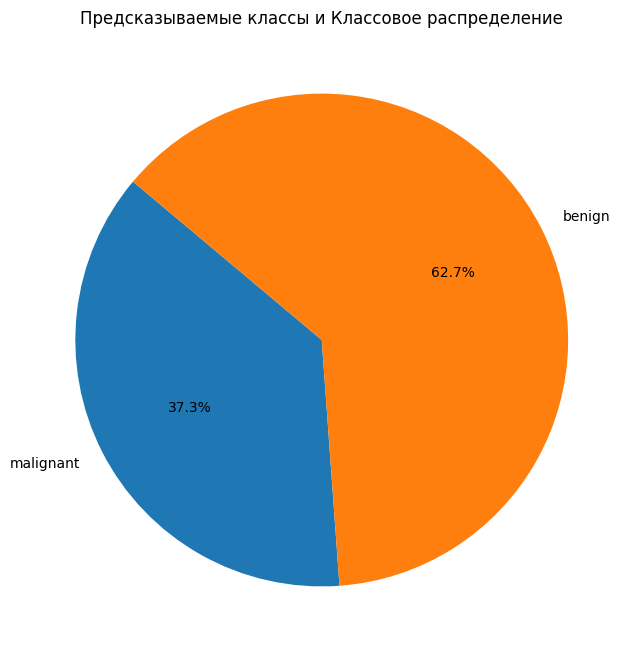

In [2]:
# Задание 2

# Загрузка данных
cancer_data = load_breast_cancer()
feature_names = cancer_data.feature_names
dataset_description = cancer_data.DESCR

# Вывод информации о датасете
print(f"Размерность датасета {cancer_data['data'].shape}")
print("Имена признаков:", feature_names)

class_labels = cancer_data['target_names']
class_counts = [sum(cancer_data['target'] == i) for i in range(len(class_labels))]

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)

plt.title('Предсказываемые классы и Классовое распределение')

plt.show()

In [3]:
# Решетчатый поиск

# Разделение на тренировочный и тестовый наборы
X_training, X_testing, y_training, y_testing = train_test_split(cancer_data.data, cancer_data.target, random_state=8)

# Параметры для алгоритма
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_training, y_training)


print('Лучший результат: {}'.format(grid_search.best_score_))
print('Лучшие параметры: {}'.format(grid_search.best_params_))

Лучший результат: 0.960093896713615
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [4]:
# Сonfusion matrix

prediction = grid_search.predict(X_testing)
confusion_matrix_result = confusion_matrix(y_testing, prediction)

print(f"Confusion Matrix:\n{confusion_matrix_result}\n")

# Результаты модели
print(f"Результаты модели:\n{classification_report(y_testing, prediction, target_names=cancer_data.target_names)}")

Confusion Matrix:
[[53  5]
 [ 1 84]]

Результаты модели:
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.95        58
      benign       0.94      0.99      0.97        85

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



Общий отчет по модели

Модель показала значительный рост, превышая предыдущий показатель.  Несмотря на диспропорцию в классах, все  злокачественные опухоли были точно выявлены, несмотря на их ограниченное представление в данных. Применение RandomForestClassifier существенно улучшило результаты по сравнению с предшествующим этапом 

In [5]:
# Задание 3

cities = ['London', 'Paris', 'New York', 'Sydney', 'Tokyo', 'Dubai']
vacation_preferences = ['Sightseeing', 'Hiking', 'Gaming', 'Cruising']
transport_preferences = ['Car', 'Train', 'Airplane']
targets = ['Paris', 'Sydney', 'Dubai']

data = {
    'salary': [random.randint(50000, 300000) for _ in range(1000)],
    'city': [random.choice(cities) for _ in range(1000)],
    'age': [random.randint(20, 65) for _ in range(1000)],
    'vacation_prefer': [random.choice(vacation_preferences) for _ in range(1000)],
    'transport_prefer': [random.choice(transport_preferences) for _ in range(1000)],
    'target': [random.choice(targets) for _ in range(1000)]
}
    
df = pd.DataFrame(data)

#Преобразование категориальных данных в числовые
df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])

In [6]:
#Обучающий и тестовый набор
X_training, X_testing, y_training, y_testing = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [7]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_training, y_training)

print('Лучший результат: {}'.format(grid_search.best_score_))
print('Лучшие параметры: {}'.format(grid_search.best_params_))

Лучший результат: 0.35742446002647066
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [8]:
# Результаты модели

prediction = grid_search.predict(X_testing)

print(f"Результаты модели:\n{classification_report(y_testing, prediction, target_names=['Paris', 'Sydney', 'Dubai'], zero_division=1)}")

Результаты модели:
              precision    recall  f1-score   support

       Paris       0.40      0.45      0.42        67
      Sydney       0.40      0.28      0.33        76
       Dubai       0.33      0.42      0.37        57

    accuracy                           0.38       200
   macro avg       0.38      0.38      0.37       200
weighted avg       0.38      0.38      0.37       200



Общий отчет по модели 2

Результаты модели оказались низкими из-за случайной генерации данных, где отсутствует взаимосвязь между признаками. Учитывая это, достижение высоких результатов любой моделью представляется затруднительным.
